In [24]:
import flask
import requests


In [25]:
from google.colab import auth

auth.authenticate_user()

In [ ]:
!pip install google-cloud-storage

In [26]:
from google.cloud import storage

# Replace with your Google Cloud Project ID
project_id = '542308821679'
client = storage.Client(project=project_id)
print(f"Listing buckets in project: {project_id}")

# List all buckets in your project
try:
    buckets = list(client.list_buckets())
    if buckets:
        for bucket in buckets:
            print(f"- {bucket.name}")
    else:
        print("No buckets found in this project.")
except Exception as e:
    print(f"Error listing buckets: {e}")
    print("Please ensure your project ID is correct and the authenticated user has permissions to list buckets.")

Listing buckets in project: 542308821679
- instance-dog-279783831978


In [27]:
from google.cloud import storage

# Replace with your bucket name and project ID
bucket_name = 'instance-dog-279783831978'
project_id = '542308821679'

client = storage.Client(project=project_id)
bucket = client.bucket(bucket_name)

# Create a dummy file
file_name = 'Usagi.txt'
with open(file_name, 'w') as f:
    f.write('Hello from Google Colab to Google Cloud Storage!')

# Upload the file
try:
    blob = bucket.blob(file_name)
    blob.upload_from_filename(file_name)
    print(f"File '{file_name}' uploaded to '{bucket_name}'.")
except Exception as e:
    print(f"Error uploading file: {e}")
    print("Please ensure the bucket exists and the authenticated user has write permissions.")

File 'Usagi.txt' uploaded to 'instance-dog-279783831978'.


In [ ]:
!pip install google-cloud-compute

In [ ]:
from google.cloud import compute_v1

# Replace with your Google Cloud Project ID and Zone
project_id = '542308821679'
zone = 'us-east4-b' # Example zone, replace with your VM's zone

# Create a Compute Engine client
instance_client = compute_v1.InstancesClient()

print(f"Listing VMs in project: {project_id}, zone: {zone}")

# List instances in a specific zone
try:
    request = compute_v1.ListInstancesRequest(project=project_id, zone=zone)
    instances = instance_client.list(request=request)

    found_vms = False
    for instance in instances:
        print(f"- {instance.name} (Status: {instance.status})")
        found_vms = True

    if not found_vms:
        print(f"No VMs found in zone '{zone}' for project '{project_id}'.")
except Exception as e:
    print(f"Error listing VMs: {e}")
    print("Please ensure your project ID and zone are correct and the authenticated user has permissions to list VMs.")

Listing VMs in project: 542308821679, zone: us-east4-b
- instance-20251217-170113 (Status: RUNNING)


In [28]:
# Make sure you have Pillow installed to handle images
!pip install Pillow

Image 'ct-scan-of-ischemic-stroke.jpg' opened successfully. Format: JPEG, Size: (350, 350)


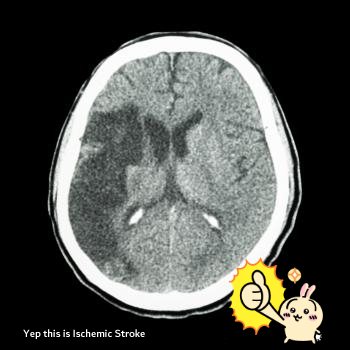

In [29]:
from google.cloud import storage
from PIL import Image
import io

# Replace with your bucket name, image file name, and project ID
bucket_name = 'instance-dog-279783831978' # e.g., 'my-image-bucket'
image_file_name = 'ct-scan-of-ischemic-stroke.jpg' # e.g., 'sunset.jpg'
project_id = '542308821679'

client = storage.Client(project=project_id)
bucket = client.bucket(bucket_name)
blob = bucket.blob(image_file_name)

try:
    # Download the image data into a BytesIO object
    image_bytes = blob.download_as_bytes()
    image_stream = io.BytesIO(image_bytes)

    # Open the image using Pillow
    img = Image.open(image_stream)

    print(f"Image '{image_file_name}' opened successfully. Format: {img.format}, Size: {img.size}")

    # Display the image
    display(img)

except Exception as e:
    print(f"Error opening image: {e}")
    print("Please ensure the bucket and image file exist, and the authenticated user has read permissions.")


In [ ]:
from google.cloud import compute_v1
import requests

# --- Configuration (UPDATE THESE VALUES) ---
project_id = '542308821679' # Your Google Cloud Project ID
zone = 'us-east4-b'         # The zone where your VM is located
instance_name = 'instance-20251217-170113' # The name of your VM instance
flask_port = 5003           # The port your Flask app is listening on
# ------------------------------------------

instance_client = compute_v1.InstancesClient()

external_ip = None

try:
    # Get instance details
    instance = instance_client.get(project=project_id, zone=zone, instance=instance_name)

    # Find the external IP address
    if instance.network_interfaces:
        for ni in instance.network_interfaces:
            if ni.access_configs:
                print(f"Debug: Processing network interface '{ni.name}'.")
                for i, ac in enumerate(ni.access_configs):
                    print(f"  Debug: AccessConfig {i}: Type={type(ac)}, Attributes={dir(ac)}")
                    # Use the correct attribute name 'nat_i_p'
                    current_nat_ip = getattr(ac, 'nat_i_p', None)
                    if current_nat_ip:
                        external_ip = current_nat_ip
                        break
            if external_ip:
                break

    if external_ip:
        print(f"Found external IP for {instance_name}: {external_ip}")
        flask_url = f"http://{external_ip}:{flask_port}"
        print(f"Attempting to connect to Flask app at: {flask_url}")

        try:
            response = requests.get(flask_url, timeout=10) # Added a timeout
            response.raise_for_status() # Raise an exception for bad status codes (4xx or 5xx)
            print("\n--- Flask App Output ---")
            print(response.text)
            print("------------------------")
        except requests.exceptions.ConnectionError:
            print(f"Error: Could not connect to the Flask app at {flask_url}.")
            print("Please ensure the VM is running, Flask is active, and firewall rules allow traffic on port {flask_port}.")
        except requests.exceptions.Timeout:
            print(f"Error: Request to {flask_url} timed out.")
            print("The Flask app might be slow, or there's a network issue.")
        except requests.exceptions.RequestException as e:
            print(f"An unexpected error occurred while requesting the Flask app: {e}")
    else:
        print(f"No external IP found for instance '{instance_name}' in zone '{zone}'.")
        print("Please ensure the VM has an external IP address configured.")

except Exception as e:
    print(f"Error retrieving VM details: {e}")
    print("Please ensure your project ID, zone, and instance name are correct and the authenticated user has permissions.")

Debug: Processing network interface 'nic0'.
  Debug: AccessConfig 0: Type=<class 'google.cloud.compute_v1.types.compute.AccessConfig'>, Attributes=['NetworkTier', 'Type', '__bool__', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'external_ipv6', 'external_ipv6_prefix_length', 'kind', 'name', 'nat_i_p', 'network_tier', 'public_ptr_domain_name', 'security_policy', 'set_public_ptr', 'type_']
Found external IP for instance-20251217-170113: 34.150.224.118
Attempting to connect to Flask app at: http://34.150.224.118:5003
Error: Could not connect to the Flask app at http://34.150.224.118:5003.
Please ensure the VM is running, Flask is act